In [123]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image
import pathlib

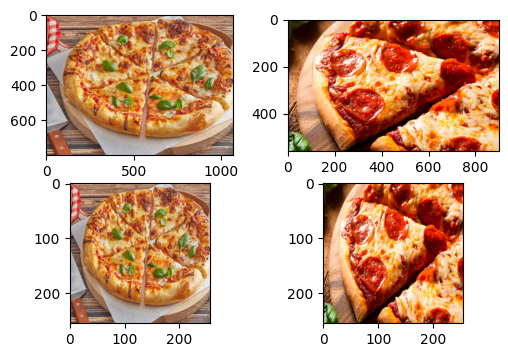

In [124]:
pizza_df = plt.imread('test/pizza2.jpg')/255
pizza2_df = plt.imread('test/pizza.jpg')/255
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0,0].imshow(pizza_df)
ax[0,1].imshow(pizza2_df);
ax[1,0].imshow(tf.image.resize(pizza_df, [256,256]))
ax[1,1].imshow(tf.image.resize(pizza2_df, [256,256]));

In [125]:
directory = "C:/Users/USER/Documents/AI Model/AI-Pro-1/train"
data_dir = pathlib.Path(directory).with_suffix('')

2983


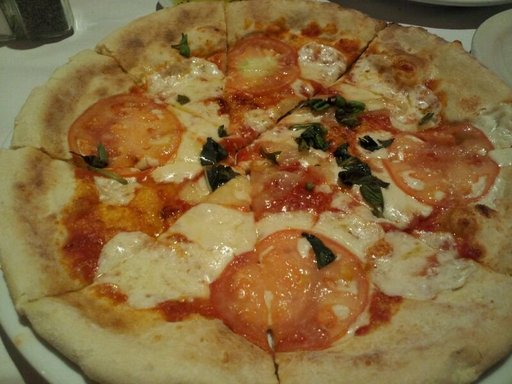

In [126]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
pizzas = list(data_dir.glob('pizza/*'))
PIL.Image.open(str(pizzas[1]))

In [127]:
batch_size = 32
img_height = 180
img_width = 180

In [128]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=5,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2983 files belonging to 3 classes.
Using 2387 files for training.


In [129]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=5,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2983 files belonging to 3 classes.
Using 596 files for validation.


In [130]:
class_names = train_ds.class_names
print(class_names)

['hot_dog', 'pizza', 'steak']


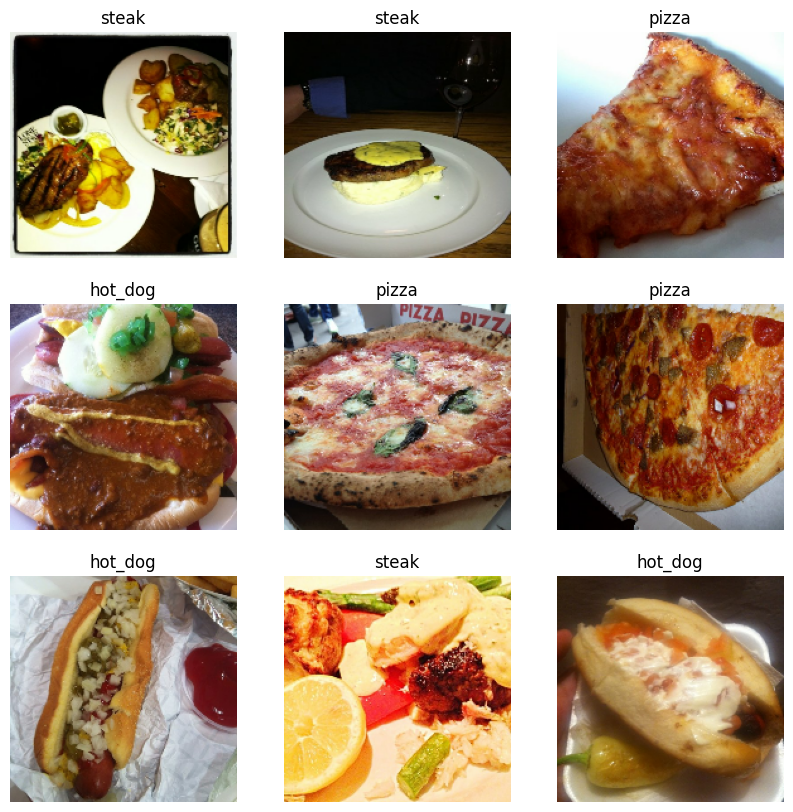

In [131]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [132]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [133]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [191]:
num_classes = 3
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128*2, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes)
])

In [192]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [194]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

Epoch 1/10
75/75 [==============================] - 5s 60ms/step - loss: 0.4495 - accuracy: 0.9166 - val_loss: 0.9673 - val_accuracy: 0.6594
Epoch 2/10
75/75 [==============================] - 5s 60ms/step - loss: 0.4353 - accuracy: 0.9225 - val_loss: 0.9962 - val_accuracy: 0.6762
Epoch 3/10
75/75 [==============================] - 5s 59ms/step - loss: 0.4163 - accuracy: 0.9351 - val_loss: 0.9713 - val_accuracy: 0.6879
Epoch 4/10
75/75 [==============================] - 5s 62ms/step - loss: 0.4198 - accuracy: 0.9422 - val_loss: 0.9716 - val_accuracy: 0.7047


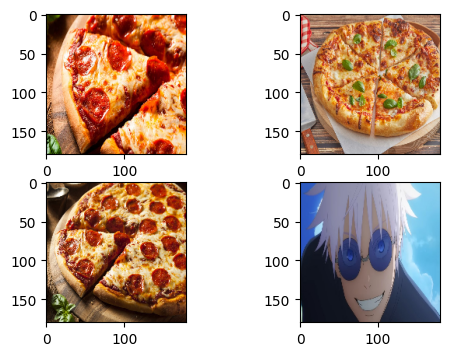

In [196]:
pizza_df = tf.image.resize(plt.imread('test/pizza.jpg')/255, [180,180])
pizza2_df = tf.image.resize(plt.imread('test/pizza2.jpg')/255, [180,180])
pizza3_df = tf.image.resize(plt.imread('test/pizza3.jpg')/255, [180,180])
gojo_df = tf.image.resize(plt.imread('test/gojosensei.jpg')/255, [180,180])
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0,0].imshow(pizza_df)
ax[0,1].imshow(pizza2_df)
ax[1,0].imshow(pizza3_df)
ax[1,1].imshow(gojo_df);

In [197]:
model.predict(pizza_df[tf.newaxis, ...])

1/1 [==============================] - 0s 82ms/step


array([[ 0.3122158 , -0.3830819 , -0.17935058]], dtype=float32)

In [198]:
model.predict(pizza2_df[tf.newaxis, ...])

1/1 [==============================] - 0s 21ms/step


array([[ 0.31084862, -0.38208058, -0.17933823]], dtype=float32)

In [199]:
model.predict(pizza3_df[tf.newaxis, ...])

1/1 [==============================] - 0s 21ms/step


array([[ 0.31201482, -0.38297012, -0.17930667]], dtype=float32)

In [200]:
model.predict(gojo_df[tf.newaxis, ...])

1/1 [==============================] - 0s 21ms/step


array([[ 0.3129882, -0.3863589, -0.1776978]], dtype=float32)

In [201]:
white_df = tf.image.resize(plt.imread('test/white.jpg')/255, [180,180])
model.predict(white_df[tf.newaxis, ...])

1/1 [==============================] - 0s 23ms/step


array([[ 0.31316507, -0.3847752 , -0.17881002]], dtype=float32)

1/1 [==============================] - 0s 22ms/step


array([[ 0.31307226, -0.3852873 , -0.17896819]], dtype=float32)

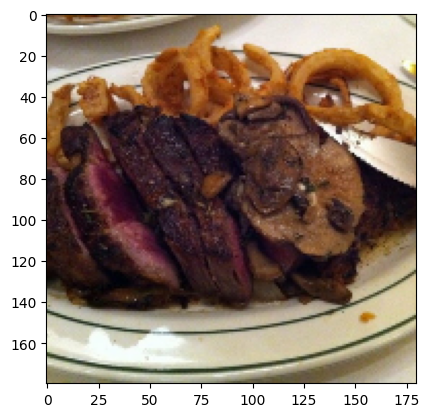

In [203]:
plt.imshow(image_batch[1])
model.predict(image_batch[1][tf.newaxis, ...])

In [205]:
results = model.evaluate(val_ds, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 65.94%


In [212]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [231]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = np.argmax(model.predict(image_batch), axis=1)
cm = confusion_matrix(labels_batch, predictions)
clr = classification_report(labels_batch, predictions, zero_division=0)

1/1 [==============================] - 0s 37ms/step


In [245]:
import seaborn as sns
import pandas as pd

In [247]:
pd.DataFrame(labels_batch.numpy()).value_counts()

1    12
0    10
2    10
Name: count, dtype: int64

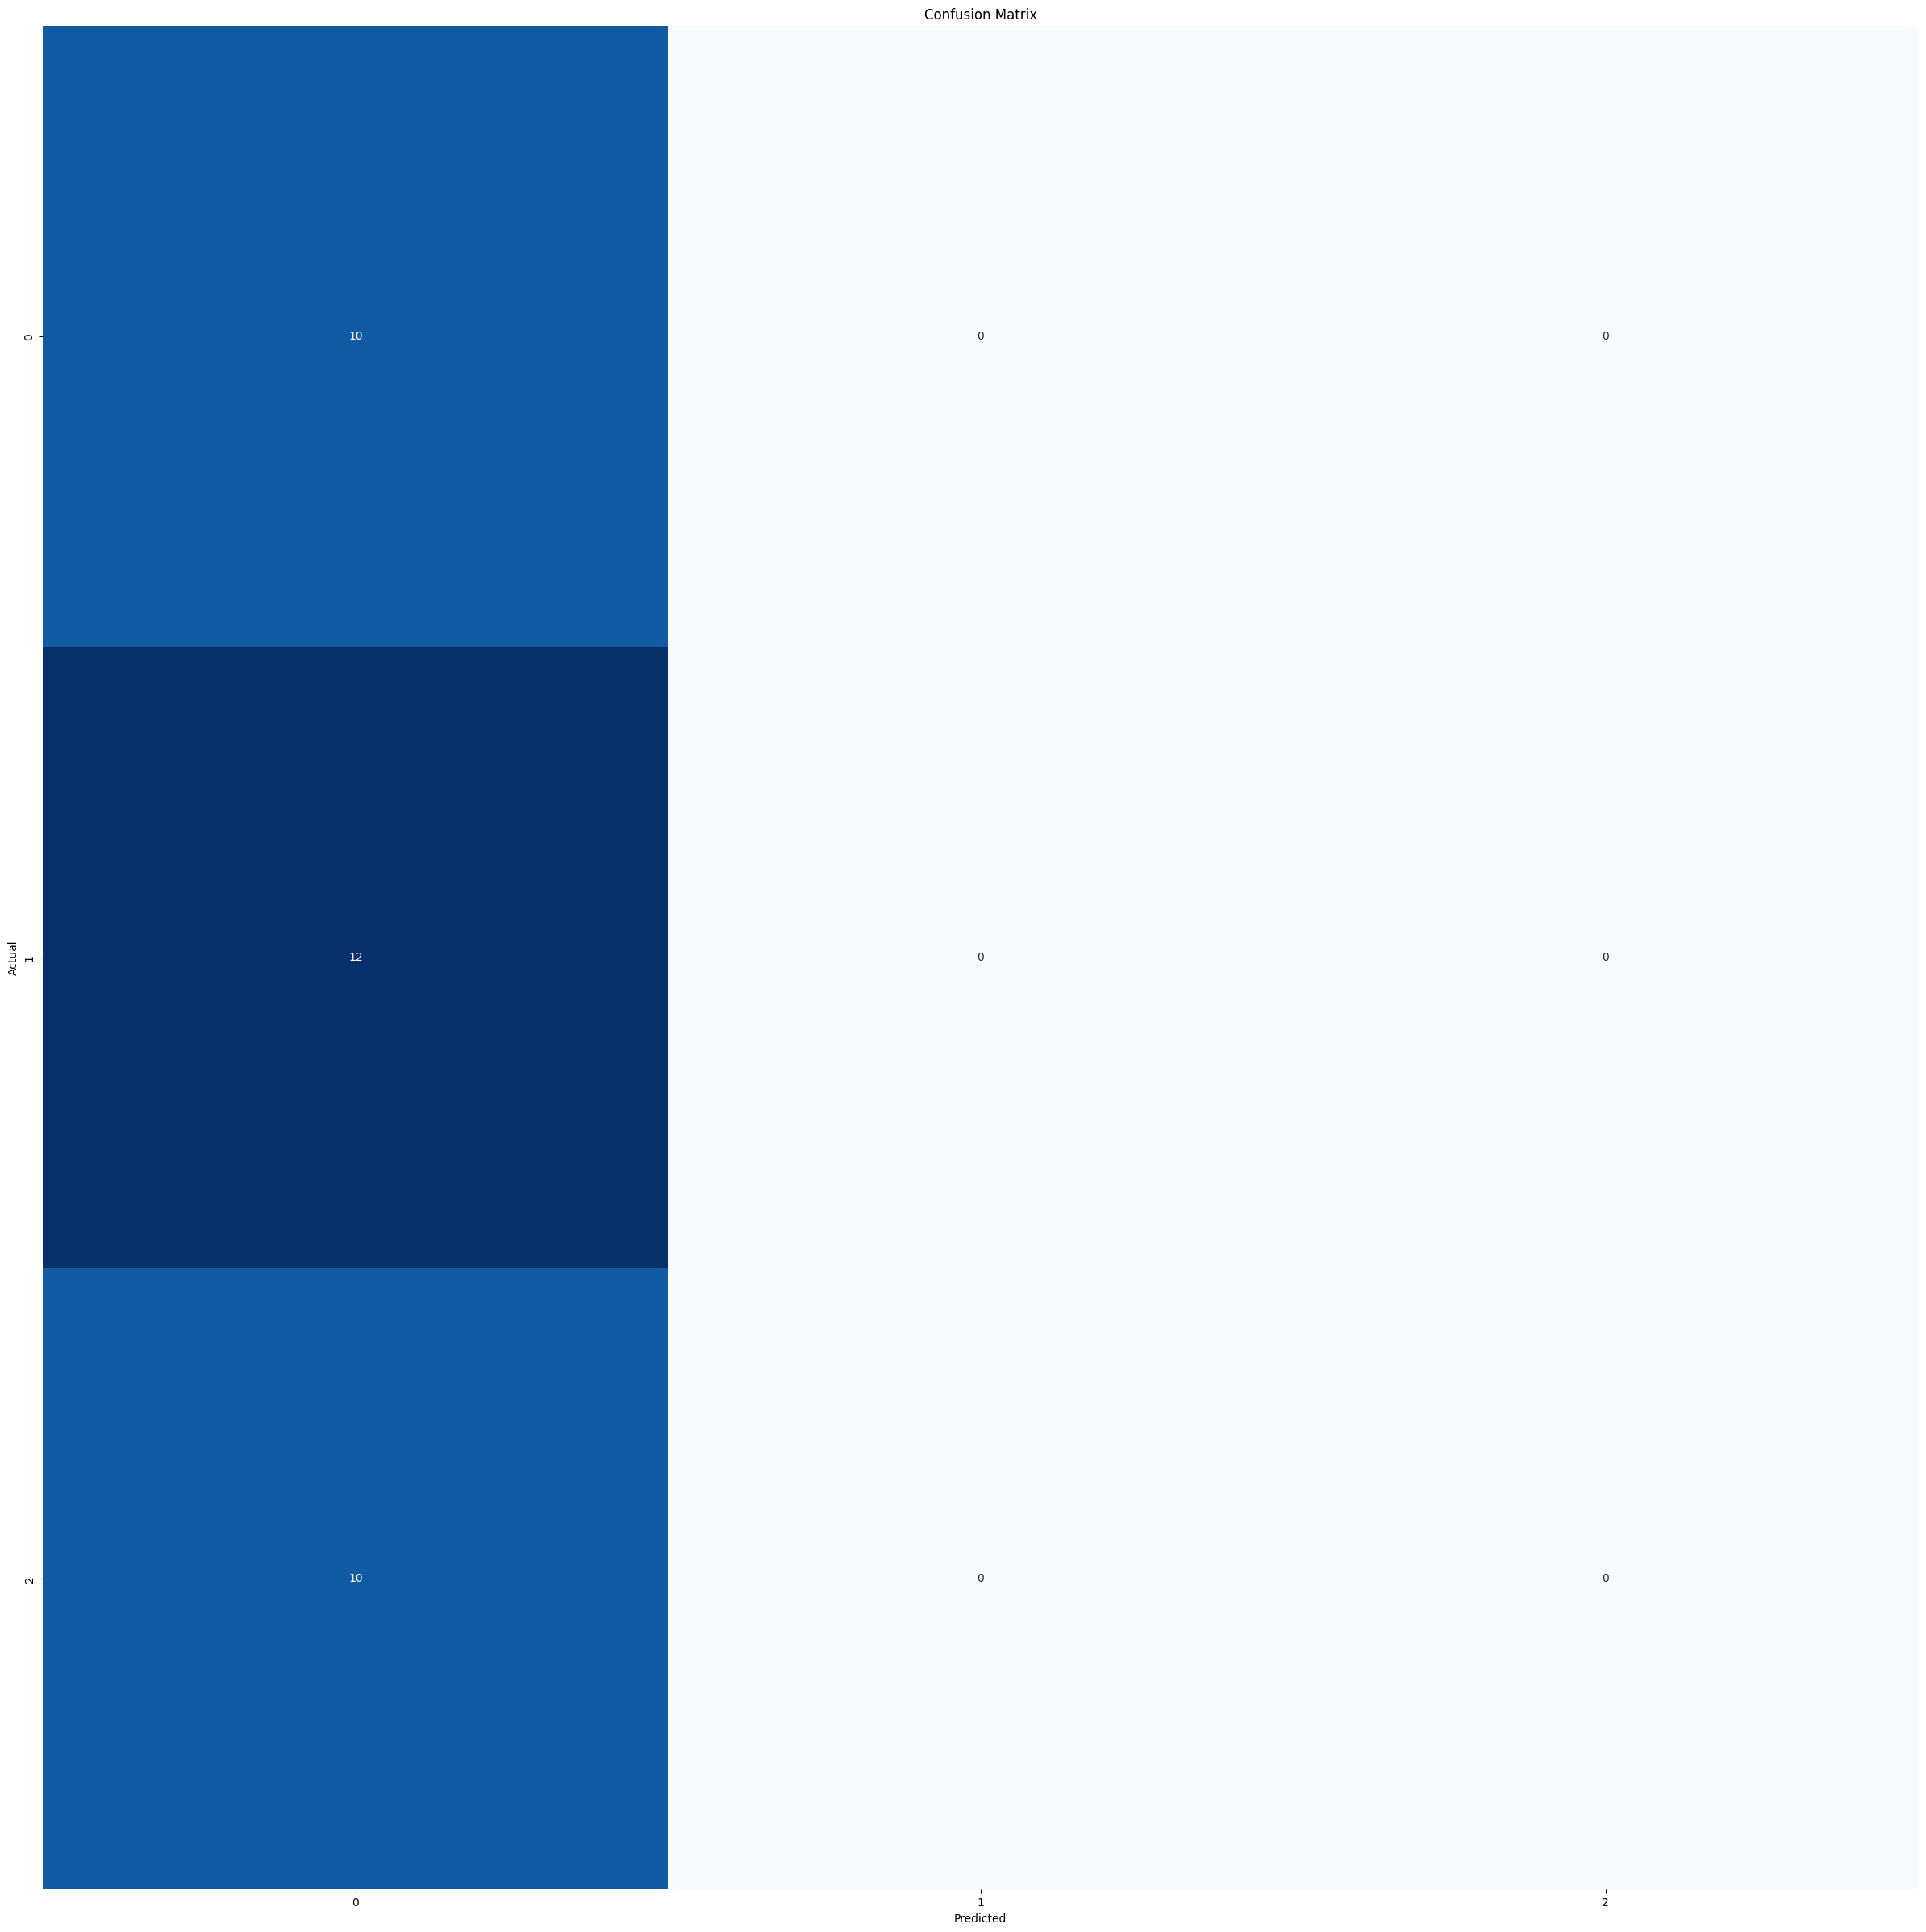

In [237]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()